In [3]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [83]:
df = pd.read_csv('combined_matches_by_teams.csv')

In [84]:
df.drop(columns=['match_id', 'blue_team_region'], inplace=True)

In [85]:
df

,blue_team_name,blue_core_shots,blue_core_goals,blue_core_saves,blue_core_assists,blue_core_score,blue_core_shooting_percentage,blue_boost_bpm,blue_boost_bcpm,blue_boost_avg_amount,blue_boost_amount_collected,blue_boost_amount_stolen,blue_boost_amount_collected_big,blue_boost_amount_stolen_big,blue_boost_amount_collected_small,blue_boost_amount_stolen_small,blue_boost_count_collected_big,blue_boost_count_stolen_big,blue_boost_count_collected_small,blue_boost_count_stolen_small,blue_boost_amount_overfill,blue_boost_amount_overfill_stolen,blue_boost_amount_used_while_supersonic,blue_boost_time_zero_boost,blue_boost_time_full_boost,blue_boost_time_boost_0_25,blue_boost_time_boost_25_50,blue_boost_time_boost_50_75,blue_boost_time_boost_75_100,blue_movement_total_distance,blue_movement_time_supersonic_speed,blue_movement_time_boost_speed,blue_movement_time_slow_speed,blue_movement_time_ground,blue_movement_time_low_air,blue_movement_time_high_air,blue_movement_time_powerslide,blue_movement_count_powerslide,blue_positioning_time_defensive_third,blue_positioning_time_neutral_third,blue_positioning_time_offensive_third,blue_positioning_time_defensive_half,blue_positioning_time_offensive_half,blue_positioning_time_behind_ball,blue_positioning_time_in_front_ball,blue_demo_inflicted,blue_demo_taken,blue_score,blue_winner,orange_team_name,orange_core_shots,orange_core_goals,orange_core_saves,orange_core_assists,orange_core_score,orange_core_shooting_percentage,orange_boost_bpm,orange_boost_bcpm,orange_boost_avg_amount,orange_boost_amount_collected,orange_boost_amount_stolen,orange_boost_amount_collected_big,orange_boost_amount_stolen_big,orange_boost_amount_collected_small,orange_boost_amount_stolen_small,orange_boost_count_collected_big,orange_boost_count_stolen_big,orange_boost_count_collected_small,orange_boost_count_stolen_small,orange_boost_amount_overfill,orange_boost_amount_overfill_stolen,orange_boost_amount_used_while_supersonic,orange_boost_time_zero_boost,orange_boost_time_full_boost,orange_boost_time_boost_0_25,orange_boost_time_boost_25_50,orange_boost_time_boost_50_75,orange_boost_time_boost_75_100,orange_movement_total_distance,orange_movement_time_supersonic_speed,orange_movement_time_boost_speed,orange_movement_time_slow_speed,orange_movement_time_ground,orange_movement_time_low_air,orange_movement_time_high_air,orange_movement_time_powerslide,orange_movement_count_powerslide,orange_positioning_time_defensive_third,orange_positioning_time_neutral_third,orange_positioning_time_offensive_third,orange_positioning_time_defensive_half,orange_positioning_time_offensive_half,orange_positioning_time_behind_ball,orange_positioning_time_in_front_ball,orange_demo_inflicted,orange_demo_taken,orange_score,orange_winner
0,GROUND ZERO GAMING,34.0,9.0,8.0,7.0,3405.0,26.470588,3625.0,3756.75639,454.34,21464.0,5310.0,14360.0,2948.0,7104.0,2362.0,179.0,34.0,629.0,212.0,3597.0,522.0,2776.0,345.60,370.91,1016.15,643.91,585.47,863.10,4694698.0,578.77,1181.50,1444.78,1720.05,1274.14,210.83,63.24,840.0,1498.34,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,True,RANGA ROUNDUP,15.0,5.0,21.0,3.0,3139.0,33.333333,3902.0,4081.96194,442.41,23270.0,3650.0,16653.0,1911.0,6617.0,1739.0,203.0,24.0,582.0,148.0,3554.0,459.0,2889.0,397.42,313.00,1060.34,735.36,548.33,799.58,4774768.0,614.48,1211.59,1382.50,1772.68,1260.34,175.53,82.76,702.0,1621.08,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0.0,False
1,RENEGADES,46.0,21.0,10.0,21.0,5671.0,45.652174,3845.0,4227.54295,469.57,25494.0,6515.0,18122.0,3942.0,7372.0,2573.0,223.0,48.0,676.0,230.0,4289.0,928.0,2719.0,321.45,311.35,1087.26,820.51,517.41,980.68,5098012.0,600.10,1431.20,1446.98,1854.27,1385.74,238.28,80.29,767.0,1338.37,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,True,TRIDENT ESPORTS,16.0,4.0,16.0,3.0,2666.0,25.000000,3579.0,3788.04349,399.09,22840.0,3531.0,16337.0,1933.0,6503.0,1598.0,184.0,22.0,557.0,125.0,1823.0,193.0,2414.0,447.40,278.31,1287.95,793.74,520.01,709.6

### Set blue and orange wins to 1 or 0 instead of true and false

In [86]:
df['blue_winner'] = df.blue_winner.astype(int)

In [87]:
df['orange_winner'] = df.orange_winner.astype(int)

In [88]:
df

,blue_team_name,blue_core_shots,blue_core_goals,blue_core_saves,blue_core_assists,blue_core_score,blue_core_shooting_percentage,blue_boost_bpm,blue_boost_bcpm,blue_boost_avg_amount,blue_boost_amount_collected,blue_boost_amount_stolen,blue_boost_amount_collected_big,blue_boost_amount_stolen_big,blue_boost_amount_collected_small,blue_boost_amount_stolen_small,blue_boost_count_collected_big,blue_boost_count_stolen_big,blue_boost_count_collected_small,blue_boost_count_stolen_small,blue_boost_amount_overfill,blue_boost_amount_overfill_stolen,blue_boost_amount_used_while_supersonic,blue_boost_time_zero_boost,blue_boost_time_full_boost,blue_boost_time_boost_0_25,blue_boost_time_boost_25_50,blue_boost_time_boost_50_75,blue_boost_time_boost_75_100,blue_movement_total_distance,blue_movement_time_supersonic_speed,blue_movement_time_boost_speed,blue_movement_time_slow_speed,blue_movement_time_ground,blue_movement_time_low_air,blue_movement_time_high_air,blue_movement_time_powerslide,blue_movement_count_powerslide,blue_positioning_time_defensive_third,blue_positioning_time_neutral_third,blue_positioning_time_offensive_third,blue_positioning_time_defensive_half,blue_positioning_time_offensive_half,blue_positioning_time_behind_ball,blue_positioning_time_in_front_ball,blue_demo_inflicted,blue_demo_taken,blue_score,blue_winner,orange_team_name,orange_core_shots,orange_core_goals,orange_core_saves,orange_core_assists,orange_core_score,orange_core_shooting_percentage,orange_boost_bpm,orange_boost_bcpm,orange_boost_avg_amount,orange_boost_amount_collected,orange_boost_amount_stolen,orange_boost_amount_collected_big,orange_boost_amount_stolen_big,orange_boost_amount_collected_small,orange_boost_amount_stolen_small,orange_boost_count_collected_big,orange_boost_count_stolen_big,orange_boost_count_collected_small,orange_boost_count_stolen_small,orange_boost_amount_overfill,orange_boost_amount_overfill_stolen,orange_boost_amount_used_while_supersonic,orange_boost_time_zero_boost,orange_boost_time_full_boost,orange_boost_time_boost_0_25,orange_boost_time_boost_25_50,orange_boost_time_boost_50_75,orange_boost_time_boost_75_100,orange_movement_total_distance,orange_movement_time_supersonic_speed,orange_movement_time_boost_speed,orange_movement_time_slow_speed,orange_movement_time_ground,orange_movement_time_low_air,orange_movement_time_high_air,orange_movement_time_powerslide,orange_movement_count_powerslide,orange_positioning_time_defensive_third,orange_positioning_time_neutral_third,orange_positioning_time_offensive_third,orange_positioning_time_defensive_half,orange_positioning_time_offensive_half,orange_positioning_time_behind_ball,orange_positioning_time_in_front_ball,orange_demo_inflicted,orange_demo_taken,orange_score,orange_winner
0,GROUND ZERO GAMING,34.0,9.0,8.0,7.0,3405.0,26.470588,3625.0,3756.75639,454.34,21464.0,5310.0,14360.0,2948.0,7104.0,2362.0,179.0,34.0,629.0,212.0,3597.0,522.0,2776.0,345.60,370.91,1016.15,643.91,585.47,863.10,4694698.0,578.77,1181.50,1444.78,1720.05,1274.14,210.83,63.24,840.0,1498.34,973.23,733.45,1967.99,1237.05,2339.78,865.27,6.0,7.0,3.0,1,RANGA ROUNDUP,15.0,5.0,21.0,3.0,3139.0,33.333333,3902.0,4081.96194,442.41,23270.0,3650.0,16653.0,1911.0,6617.0,1739.0,203.0,24.0,582.0,148.0,3554.0,459.0,2889.0,397.42,313.00,1060.34,735.36,548.33,799.58,4774768.0,614.48,1211.59,1382.50,1772.68,1260.34,175.53,82.76,702.0,1621.08,1060.71,526.78,2209.56,998.99,2318.26,890.30,7.0,6.0,0.0,0
1,RENEGADES,46.0,21.0,10.0,21.0,5671.0,45.652174,3845.0,4227.54295,469.57,25494.0,6515.0,18122.0,3942.0,7372.0,2573.0,223.0,48.0,676.0,230.0,4289.0,928.0,2719.0,321.45,311.35,1087.26,820.51,517.41,980.68,5098012.0,600.10,1431.20,1446.98,1854.27,1385.74,238.28,80.29,767.0,1338.37,1247.16,892.76,1972.65,1505.61,2616.06,862.25,11.0,7.0,3.0,1,TRIDENT ESPORTS,16.0,4.0,16.0,3.0,2666.0,25.000000,3579.0,3788.04349,399.09,22840.0,3531.0,16337.0,1933.0,6503.0,1598.0,184.0,22.0,557.0,125.0,1823.0,193.0,2414.0,447.40,278.31,1287.95,793.74,520.01,709.63,4893312.

### Split the data

In [13]:
def train_validate_test(df, rs, strat):
    """
    Splits data into 3 segments and stratifies on target
    requires the dataframe and target as args
    """
    train_val, test = train_test_split(df,
                                       train_size=0.82,
                                       random_state=rs,
                                        stratify=df[strat])
        
                                   
    train, validate = train_test_split(train_val,
                                       train_size=0.73,
                                       random_state=rs,
                                      stratify=train_val[strat])
                                     
    return train, validate, test

In [90]:
train, val, test = train_validate_test(df, 706)

In [91]:
train.shape, val.shape, test.shape

((2590, 98), (959, 98), (780, 98))

### Which color wins more?

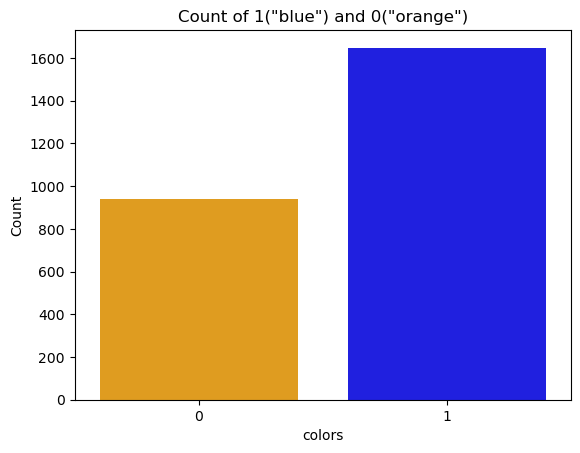

In [41]:
sns.countplot(x='blue_winner', data=train, palette=['orange', 'blue'])

# add axis labels and title
plt.xlabel('colors')
plt.ylabel('Count')
plt.title('Count of 1("blue") and 0("orange")')

# show the plot
plt.show()

In [42]:
train.blue_winner.value_counts(normalize=True)

1    0.636293
0    0.363707
Name: blue_winner, dtype: float64

### H$0$: There is no statistical difference in blue winner and orange winner
### H$a$: There is a statistical difference in blue winner and orange winner

In [55]:
alpha = 0.05

In [43]:
contingency_table = pd.crosstab(train.blue_winner, train.orange_winner)

In [53]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


In [56]:
if p_value < alpha:
    print('can reject null hypothesis')
else:
    print('faild to reject null hypothesis')

can reject null hypothesis


### do more demos per series lead to more wins? 

#### since the df used was a combined in the prep stage for each series played I'm gonna go back to the uncombined df to more easily groupby individual teams. 

In [4]:
df = pd.read_csv('matches_by_teams.csv')

In [5]:
df['winner'] = np.where(df['winner'], 1, 0)

In [10]:
df.dropna(inplace=True)

In [14]:
train, val, test = train_validate_test(df, 706, 'winner')

In [15]:
train

,match_id,color,team_id,team_slug,team_name,team_region,core_shots,core_goals,core_saves,core_assists,core_score,core_shooting_percentage,boost_bpm,boost_bcpm,boost_avg_amount,boost_amount_collected,boost_amount_stolen,boost_amount_collected_big,boost_amount_stolen_big,boost_amount_collected_small,boost_amount_stolen_small,boost_count_collected_big,boost_count_stolen_big,boost_count_collected_small,boost_count_stolen_small,boost_amount_overfill,boost_amount_overfill_stolen,boost_amount_used_while_supersonic,boost_time_zero_boost,boost_time_full_boost,boost_time_boost_0_25,boost_time_boost_25_50,boost_time_boost_50_75,boost_time_boost_75_100,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
5511,61e5b61fc437fde7e02ccc4b,orange,6020bc70f1e4807cc7002386,https://octane.gg/teams/2386-rogue,ROGUE,North America,18.0,9.0,28.0,5.0,4673.0,50.000000,4986.0,4969.96733,522.93,28599.0,4376.0,19594.0,2586.0,9005.0,1790.0,225.0,30.0,760.0,157.0,2906.0,424.0,4325.0,541.55,332.36,1722.58,1037.98,633.75,777.11,6322260.0,742.85,1713.37,1895.68,2385.21,1704.36,262.30,73.13,664.0,2410.57,1273.98,667.32,3136.15,1215.73,3088.64,1263.22,7.0,20.0,0.0,0
9374,626f9d9cc437fde7e02d5174,blue,6169f5ba143c37878b23960b,https://octane.gg/teams/960b-kru-esports,KRÜ ESPORTS,South America,58.0,10.0,29.0,7.0,7046.0,17.241379,8982.0,8999.36676,1028.96,56676.0,12447.0,38888.0,7185.0,17788.0,5262.0,465.0,83.0,1566.0,452.0,8137.0,1210.0,9263.0,997.38,962.81,2803.60,1696.19,1463.77,1989.44,11924296.0,1256.46,3199.39,3632.53,4742.90,2826.93,518.55,193.61,1943.0,3743.92,2696.79,1647.64,5226.05,2862.23,5916.86,2171.50,21.0,30.0,3.0,0
21,6159ad3d143c37878b2384b3,orange,60ceea8788116f536df972cc,https://octane.gg/teams/72cc-bandits-esc,BANDITS ESC,Oceania,28.0,7.0,28.0,7.0,5240.0,25.000000,5075.0,5199.14536,618.70,37246.0,8618.0,25592.0,5274.0,11654.0,3344.0,326.0,63.0,1011.0,278.0,6036.0,640.0,6586.0,563.53,657.48,1752.67,1100.14,967.80,1366.35,7999786.0,980.82,2064.97,2218.52,3055.18,1868.42,340.75,131.76,1199.0,2759.45,1575.48,929.41,3621.04,1643.30,3760.31,1504.02,13.0,18.0,1.0,0
2657,6183e0adf8090ec74528adf0,orange,6154271c143c37878b2380a5,https://octane.gg/teams/80a5-mad-titans,MAD TITANS,Middle East & North Africa,31.0,11.0,20.0,9.0,4774.0,35.483871,4988.0,5088.37776,537.89,28966.0,6230.0,20159.0,3737.0,8807.0,2493.0,234.0,42.0,765.0,217.0,2815.0,461.0,4621.0,654.99,426.50,1732.12,930.12,595.26,880.09,6270167.0,771.72,1613.36,1891.63,2515.89,1560.24,200.58,86.63,813.0,2145.74,1288.34,842.62,2849.41,1427.31,2965.08,1311.64,16.0,15.0,1.0,0
5112,61e5b725da9d7ca1c7ba51a2,blue,6020c717f1e4807cc70490d6,https://octane.gg/teams/90d6-1620-kings,1620 KINGS,Oceania,20.0,10.0,11.0,6.0,3623.0,50.000000,3481.0,3624.06452,466.01,21522.0,3632.0,15228.0,1925.0,6294.0,1707.0,190.0,25.0,563.0,150.0,3922.0,611.0,2673.0,276.33,425.07,847.05,804.20,691.13,898.71,4865367.0,531.78,1278.73,1551.66,1907.61,1268.67,185.94,82.48,755.0,1584.83,1146.94,630.44,2218.29,1143.87,2415.97,946.24,16.0,7.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,6160626af8090ec745286ff4,orange,6074990c8c85ced5f379e9e0,https://octane.gg/teams/e9e0-bs-competition,BS+COMPETITION,Europe,25.0,11.0,26.0,10.0,5082.0,44.000000,4041.0,4300.41296,552.11,24044.0,4006.0,14760.0,1841.0,9284.0,2165.0,176.0,23.0,793.0,185.0,2911.0,486.0,2307.0,421.97,451.16,1515.77,993.42,671.83,920.26,5619317.0,442.93,1517.00,2226.32,2425.33,

In [109]:
train.shape, val.shape, test.shape

((6341, 54), (2346, 54), (1907, 54))

In [25]:
demos = train.groupby('team_name').sum()

In [27]:
demos

,core_shots,core_goals,core_saves,core_assists,core_score,core_shooting_percentage,boost_bpm,boost_bcpm,boost_avg_amount,boost_amount_collected,boost_amount_stolen,boost_amount_collected_big,boost_amount_stolen_big,boost_amount_collected_small,boost_amount_stolen_small,boost_count_collected_big,boost_count_stolen_big,boost_count_collected_small,boost_count_stolen_small,boost_amount_overfill,boost_amount_overfill_stolen,boost_amount_used_while_supersonic,boost_time_zero_boost,boost_time_full_boost,boost_time_boost_0_25,boost_time_boost_25_50,boost_time_boost_50_75,boost_time_boost_75_100,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,positioning_time_defensive_third,positioning_time_neutral_third,positioning_time_offensive_third,positioning_time_defensive_half,positioning_time_offensive_half,positioning_time_behind_ball,positioning_time_in_front_ball,demo_inflicted,demo_taken,score,winner
team_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
+966,201.0,48.0,130.0,38.0,27477.0,156.287564,30157.0,30444.23339,3254.83,185113.0,37179.0,130327.0,22542.0,54786.0,14637.0,1500.0,259.0,4549.0,1244.0,19772.0,3329.0,28755.0,4464.37,2348.14,11010.23,5199.83,3866.81,6101.35,39683975.0,4718.00,10145.36,12141.03,13979.40,11215.35,1809.62,510.89,4532.0,12925.10,8509.60,5569.73,17461.73,9542.50,19835.27,7169.17,70.0,97.0,12.0,3
00 NATION,1336.0,306.0,895.0,241.0,187989.0,1009.431288,206277.0,211402.63287,24302.00,1248625.0,270005.0,838552.0,157921.0,410073.0,112084.0,10157.0,1858.0,35084.0,9578.0,178436.0,28323.0,155996.0,21370.82,17794.28,65449.14,41806.68,31392.37,42260.68,271502075.0,27911.89,74298.27,82710.47,103678.28,69327.34,11914.82,4559.06,45064.0,88356.40,60888.97,35675.13,121575.55,63344.80,133853.59,51066.95,586.0,528.0,78.0,17
01 ESPORTS,475.0,106.0,253.0,88.0,59819.0,283.241700,72079.0,73661.00863,7606.56,416736.0,85963.0,290045.0,50849.0,126691.0,35114.0,3357.0,579.0,10855.0,3016.0,45466.0,7095.0,55379.0,8476.66,4478.60,23433.09,12369.48,9300.89,12401.72,85360202.0,9018.84,23102.45,26674.63,32367.84,22776.02,3651.90,1144.99,10298.0,28131.54,19016.50,11647.77,38306.54,20489.18,43499.83,15296.09,230.0,184.0,30.0,7
1620 KINGS,975.0,302.0,559.0,224.0,137815.0,927.845441,140411.0,144900.70547,17289.03,855327.0,195454.0,603644.0,119321.0,251683.0,76133.0,7363.0,1430.0,21758.0,6538.0,124747.0,21097.0,103405.0,13943.61,13821.78,42899.53,28782.29,23086.17,31568.15,187390811.0,18129.91,51661.04,59954.85,73809.18,48826.14,7110.50,3077.55,29826.0,60429.54,42607.20,26709.02,83076.25,46669.28,93026.66,36719.19,399.0,299.0,70.0,19
1NE ESPORTS,359.0,88.0,158.0,57.0,42624.0,250.177460,51443.0,52082.22871,5636.45,292755.0,62847.0,207766.0,37484.0,84989.0,25363.0,2446.0,427.0,7376.0,2168.0,37166.0,5344.0,31849.0,5771.20,3586.96,15334.31,8873.78,6985.80,9610.14,61803379.0,6155.44,17607.64,17786.06,23058.21,16272.29,2218.83,1088.68,10244.0,18117.44,14850.02,8581.78,25959.37,15589.89,30159.07,11390.16,107.0,113.0,25.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOU'RE THROWING,790.0,193.0,477.0,146.0,107189.0,609.335653,129967.0,132033.55163,14365.89,756095.0,153784.0,530718.0,88326.0,225377.0,65458.0,6320.0,1035.0,18723.0,5338.0,93370.0,13662.0,121495.0,16144.91,11157.43,41828.32,20795.48,16944.14,25303.39,161257561.0,19615.50,42915.66,44967.53,59240.84,41898.55,6359.26,1987.59,18801.0,51654.38,33809.43,22034.76,69443.81,38054.68,77207.63,30291.08,298.0,319.0,42.0,9
ZBURA,56.0,21.0,52.0,14.0,11255.0,77.101449,12789.0,13376.89787,1706.54,75727.0,13012.0,52234.0,7844.0,23493.0,5168.0,618.0,94.0,2064.0,463.0,9132.0,1531.0,5072.0,1681.47,1038.38,4587.94,2873.97,2059.91,2970.55,17686556.0,1205.78,5542.65,6130.51,7706.92,4718.10,

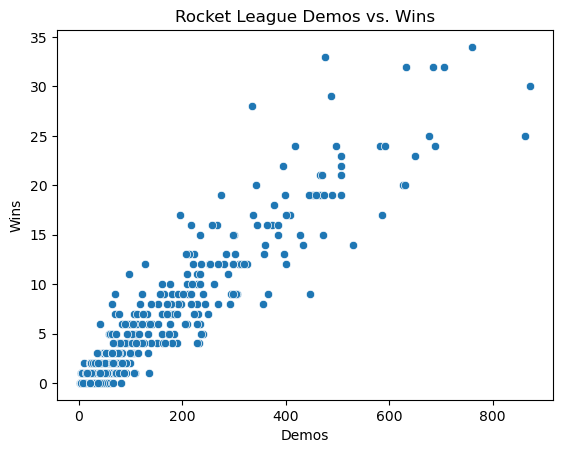

In [26]:
sns.scatterplot(data=demos, x='demo_inflicted', y='winner')
plt.title('Rocket League Demos vs. Wins')
plt.xlabel('Demos')
plt.ylabel('Wins')
plt.show()

- it would seem that there is a correlation between demos and wins
- but does that just a coincidence if a team has more games played then more chances for demos